#　官网的ＮＮ的教程

In [1]:
import torch
import math
import matplotlib.pyplot as plt

In [2]:
x = torch.linspace(-math.pi,math.pi,2000)
y = torch.sin(x)

In [3]:
p = torch.tensor([1,2,3])
xx = x.unsqueeze(-1).pow(p)

In [4]:
x.unsqueeze(-1).pow(p)

tensor([[ -3.1416,   9.8696, -31.0063],
        [ -3.1384,   9.8499, -30.9133],
        [ -3.1353,   9.8301, -30.8205],
        ...,
        [  3.1353,   9.8301,  30.8205],
        [  3.1384,   9.8499,  30.9133],
        [  3.1416,   9.8696,  31.0063]])

In [5]:
#构建模型
model = torch.nn.Sequential(
    torch.nn.Linear(3,1),
    torch.nn.Flatten(0,1)
)

In [6]:
loss_fn = torch.nn.MSELoss(reduction = 'sum')
lr = 1e-6

In [7]:
for t in range(2000):
    y_pred = model(xx)
    loss = loss_fn(y_pred,y)
    if t%400 ==0:
        print(t,loss.item())
    #反向传播前清零梯度    
    model.zero_grad()
    #反向传播
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= lr * param.grad
    
    

0 81459.40625
400 130.89259338378906
800 33.5351448059082
1200 13.888667106628418
1600 9.873470306396484


In [8]:
linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + \
      {linear_layer.weight[:, 0].item()} x + \
      {linear_layer.weight[:, 1].item()} x^2 + \
      {linear_layer.weight[:, 2].item()} x^3')

Result: y = -0.010141723789274693 +       0.845540463924408 x +       0.0017496156506240368 x^2 +       -0.09173723310232162 x^3


In [9]:
y_pred = model(xx).detach().numpy()

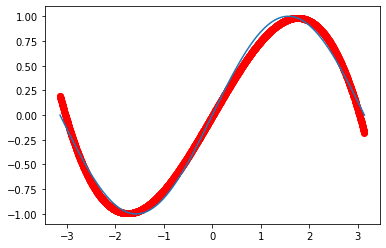

In [10]:
plt.scatter(x,y_pred,color='red')
plt.plot(x,y.numpy())
plt.show()